# Regression Experiment

Text(0,0.5,'loss')

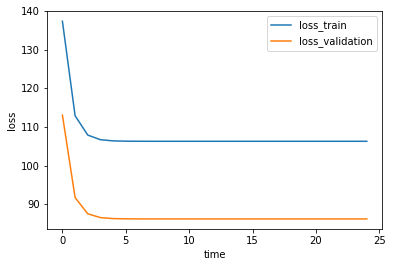

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
#读取数据集
X,y = ds.load_svmlight_file("D:/traindata/housing_scale.txt")
X = X.toarray()
row = X.shape[0]
B = np.ones([row,])
X = np.c_[X,B]
#切分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
r_train = X_train.shape[0]
#参数全零初始化
W = np.zeros([14,])
#学习率
lr = 0.09
#λ参数
lamda = 0.5
#迭代次数
s = 25
#储存迭代中loss值
L_train = np.zeros([s])
L_validation = np.zeros([s])
for n in range(s):
    #梯度初始化
    g = 0
    #对训练集所有样本求梯度g
    for i in range(r_train):
        g = g + lamda*W + np.dot(X_train[i].T,X_train[i])*W-np.dot(X_train[i].T,y_train[i])
    #取平均值
    g = g/r_train
    #更新模型参数
    W = W - lr*g
    #计算训练集loss
    L_train[n] = 0.5*np.dot(W.T,W)+0.5*np.dot((y_train-np.dot(X_train,W)).T,y_train-np.dot(X_train,W))/r_train
    #计算验证集loss
    L_validation[n] = 0.5*np.dot(W.T,W)+0.5*np.dot((y_test-np.dot(X_test,W)).T,y_test-np.dot(X_test,W))/(row-r_train)
#制图
n = np.arange(s)
plt.plot(n,L_train[n],label='loss_train')
plt.plot(n,L_validation[n],label='loss_validation')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')